In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')


In [3]:
data.head()


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data Preprocessing

In [4]:
data.shape


(7920, 3)

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing


In [9]:
import re
import string

In [11]:
data ["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

covert uppercase to lowercase

In [21]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))



In [22]:
data ["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [24]:
import re

data["tweet"] = data["tweet"].apply(
    lambda x: re.sub(r'http\S+|www\S+', '', str(x))
)


In [25]:
data ["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove punctuations

In [26]:
data["tweet"] = data["tweet"].apply(
    lambda x: re.sub(r'[^\w\s]', '', str(x))
)

In [27]:
data ["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

remove numbers

In [31]:
data ["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [32]:
data["tweet"] = data["tweet"].apply(
    lambda x: re.sub(r'\d+', '', str(x))
)

In [33]:
data ["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stop words

In [35]:
!pip install nltk

In [38]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jithm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [42]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

data["tweet"] = data["tweet"].apply(
    lambda x: " ".join(
        word for word in str(x).split()
        if word not in stop_words
    )
)


In [40]:
data ["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

stemming

In [41]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jithm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [44]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

data["tweet"] = data["tweet"].apply(
    lambda x: " ".join(
        stemmer.stem(word) for word in str(x).split()
    )
)


In [47]:
data ["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [46]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


# Building Vocabulary

In [53]:
from collections import Counter
vocab = Counter ()

In [54]:
vocab

Counter()

In [57]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [59]:
len(vocab)

15236

In [61]:
data.shape

(7920, 3)

In [62]:
tokens = [key for key in vocab if vocab[key]>10]

In [64]:
len(tokens)

1146

In [65]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batteri',


In [71]:
import os

os.makedirs("../model", exist_ok=True)


In [76]:
os.makedirs("../model/static", exist_ok=True)


In [77]:
def save_vocabulary(lines, filename):
    with open(filename, "w", encoding="utf-8") as file:
        file.write("\n".join(lines))

save_vocabulary(tokens, "../model/static/vocabulary.txt")


In [78]:
def save_corpora(lines, filename):
    with open(filename, "w", encoding="utf-8") as file:
        file.write("\n".join(lines))

save_corpora(data["tweet"].tolist(), "../model/static/corpora.txt")


In [79]:
import os
os.listdir("../model/static")


['corpora.txt', 'vocabulary.txt']

# Divide Dataset

In [80]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [81]:
x=data['tweet']
y=data['label']

In [82]:
x

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [83]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [89]:
x_train.shape

(6336,)

In [90]:
x_test.shape

(1584,)

In [94]:
y_test

1508    1
305     0
6086    0
6027    0
5332    0
       ..
2004    0
4180    0
965     1
2511    0
2561    0
Name: label, Length: 1584, dtype: int64

In [96]:
x_test

1508    shaynetward sorri hear couldnt get proper phon...
305     follow capetownsup instagram sup surf fun cape...
6086                             got new iphon today appl
6027    come soon mycard barcod scanner ean code aztec...
5332    today photographi ipad chile tbt nice good sur...
                              ...                        
2004    daybut feel better iphon appl newphon rosegold...
4180    peaceeverev happi peopl music lp record vinyl ...
965     dear appl im u make download huge updat slow p...
2511    abfadoffici thank come us custom cute iphon li...
2561    trial xtreme андроид android game news io appl...
Name: tweet, Length: 1584, dtype: object

# vectorizartion

In [97]:
def vectorizer(ds, vocabulary):
    vectorized_list = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_list.append(sentence_lst)

    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)
    return vectorized_list_new

In [98]:
vectorized_x_train = vectorizer(x_train,tokens)

In [99]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [100]:
vectorized_x_test = vectorizer(x_test,tokens)

In [101]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [102]:
y_train

7081    0
2717    0
589     0
4898    0
2923    1
       ..
2277    0
2216    0
3209    0
5645    0
7470    0
Name: label, Length: 6336, dtype: int64

In [103]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [105]:
y_test

1508    1
305     0
6086    0
6027    0
5332    0
       ..
2004    0
4180    0
965     1
2511    0
2561    0
Name: label, Length: 1584, dtype: int64

In [107]:
y_train.value_counts()

label
0    4718
1    1618
Name: count, dtype: int64

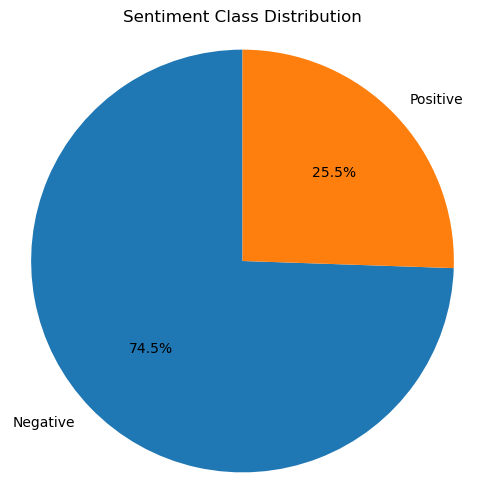

In [115]:
import matplotlib.pyplot as plt

label_map = {0: "Negative", 1: "Positive"}

labels = y_train.value_counts().index.map(label_map)
sizes = y_train.value_counts().values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Class Distribution")
plt.axis('equal')
plt.show()




### Handle Imbalanced Dataset

In [116]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE
vectorized_x_train_smote, y_train_smote = smote.fit_resample(
    vectorized_x_train, y_train
)

# Check new shapes
print(vectorized_x_train_smote.shape, y_train_smote.shape)


(9436, 1146) (9436,)


In [117]:
import pandas as pd

pd.Series(y_train_smote).value_counts()


label
0    4718
1    4718
Name: count, dtype: int64

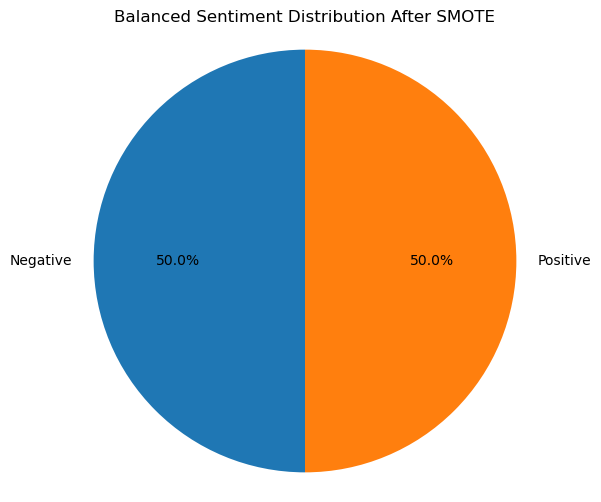

In [121]:
import matplotlib.pyplot as plt
import pandas as pd

# Get class counts after SMOTE
counts = pd.Series(y_train_smote).value_counts()

label_map = {0: "Negative", 1: "Positive"}

labels = counts.index.map(label_map)
sizes = counts.values

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Balanced Sentiment Distribution After SMOTE")
plt.axis('equal')
plt.show()




In [122]:
vectorized_x_train_smote


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [123]:
y_train_smote

0       0
1       0
2       0
3       0
4       1
       ..
9431    1
9432    1
9433    1
9434    1
9435    1
Name: label, Length: 9436, dtype: int64

In [124]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [125]:
y_test

1508    1
305     0
6086    0
6027    0
5332    0
       ..
2004    0
4180    0
965     1
2511    0
2561    0
Name: label, Length: 1584, dtype: int64

# Model training and Model Evaluation

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [127]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr  = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1  = round(f1_score(y_act, y_pred), 3)

    print(
        f"Training Scores:\n"
        f"\tAccuracy  = {acc}\n"
        f"\tPrecision = {pr}\n"
        f"\tRecall    = {rec}\n"
        f"\tF1-Score  = {f1}"
    )


def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr  = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1  = round(f1_score(y_act, y_pred), 3)

    print(
        f"Testing Scores:\n"
        f"\tAccuracy  = {acc}\n"
        f"\tPrecision = {pr}\n"
        f"\tRecall    = {rec}\n"
        f"\tF1-Score  = {f1}"
    )


### Logistic Regression

In [128]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

LogisticRegression()

In [129]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [130]:
y_train_pred

array([0, 0, 0, ..., 1, 1, 1])

In [131]:
y_train_smote

0       0
1       0
2       0
3       0
4       1
       ..
9431    1
9432    1
9433    1
9434    1
9435    1
Name: label, Length: 9436, dtype: int64

In [132]:
training_scores(y_train_smote,y_train_pred)

Training Scores:
	Accuracy  = 0.944
	Precision = 0.921
	Recall    = 0.972
	F1-Score  = 0.946


In [133]:
y_test_pred = lr.predict(vectorized_x_test)

In [134]:
y_test_pred

array([1, 0, 0, ..., 1, 0, 0])

In [135]:
y_test

1508    1
305     0
6086    0
6027    0
5332    0
       ..
2004    0
4180    0
965     1
2511    0
2561    0
Name: label, Length: 1584, dtype: int64

In [136]:
validation_scores(y_test,y_test_pred)

Testing Scores:
	Accuracy  = 0.854
	Precision = 0.679
	Recall    = 0.824
	F1-Score  = 0.744


In [137]:
from sklearn.linear_model import LogisticRegression

# Initialize model
lr = LogisticRegression(max_iter=1000)

# Train model (on SMOTE-balanced training data)
lr.fit(vectorized_x_train_smote, y_train_smote)

# Predictions
y_train_pred = lr.predict(vectorized_x_train_smote)
y_test_pred  = lr.predict(vectorized_x_test)

# Evaluation
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy  = 0.944
	Precision = 0.921
	Recall    = 0.972
	F1-Score  = 0.946
Testing Scores:
	Accuracy  = 0.854
	Precision = 0.679
	Recall    = 0.824
	F1-Score  = 0.744


### Naive Bayes

In [138]:
from sklearn.naive_bayes import MultinomialNB

# Initialize model
nb = MultinomialNB()

# Train model
nb.fit(vectorized_x_train_smote, y_train_smote)

# Predictions
y_train_pred_nb = nb.predict(vectorized_x_train_smote)
y_test_pred_nb  = nb.predict(vectorized_x_test)

# Evaluation
training_scores(y_train_smote, y_train_pred_nb)
validation_scores(y_test, y_test_pred_nb)


Training Scores:
	Accuracy  = 0.91
	Precision = 0.874
	Recall    = 0.96
	F1-Score  = 0.915
Testing Scores:
	Accuracy  = 0.85
	Precision = 0.651
	Recall    = 0.904
	F1-Score  = 0.757


### Decision Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=None   # you can limit this later to avoid overfitting
)

# Train model (on SMOTE-balanced training data)
dt.fit(vectorized_x_train_smote, y_train_smote)

# Predictions
y_train_pred_dt = dt.predict(vectorized_x_train_smote)
y_test_pred_dt  = dt.predict(vectorized_x_test)

# Evaluation
training_scores(y_train_smote, y_train_pred_dt)
validation_scores(y_test, y_test_pred_dt)


Training Scores:
	Accuracy  = 1.0
	Precision = 1.0
	Recall    = 0.999
	F1-Score  = 1.0
Testing Scores:
	Accuracy  = 0.829
	Precision = 0.653
	Recall    = 0.716
	F1-Score  = 0.683


### Random Forest 

In [142]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train model (on SMOTE-balanced training data)
rf.fit(vectorized_x_train_smote, y_train_smote)

# Predictions
y_train_pred_rf = rf.predict(vectorized_x_train_smote)
y_test_pred_rf  = rf.predict(vectorized_x_test)

# Evaluation
training_scores(y_train_smote, y_train_pred_rf)
validation_scores(y_test, y_test_pred_rf)


Training Scores:
	Accuracy  = 1.0
	Precision = 1.0
	Recall    = 0.999
	F1-Score  = 1.0
Testing Scores:
	Accuracy  = 0.859
	Precision = 0.728
	Recall    = 0.723
	F1-Score  = 0.726


### Support Vector Classifier (SVC)

In [143]:
from sklearn.svm import SVC

# Initialize model
svc = SVC(
    kernel="linear",   # best choice for text data
    random_state=42
)

# Train model (on SMOTE-balanced training data)
svc.fit(vectorized_x_train_smote, y_train_smote)

# Predictions
y_train_pred_svc = svc.predict(vectorized_x_train_smote)
y_test_pred_svc  = svc.predict(vectorized_x_test)

# Evaluation
training_scores(y_train_smote, y_train_pred_svc)
validation_scores(y_test, y_test_pred_svc)


Training Scores:
	Accuracy  = 0.955
	Precision = 0.93
	Recall    = 0.984
	F1-Score  = 0.956
Testing Scores:
	Accuracy  = 0.84
	Precision = 0.659
	Recall    = 0.782
	F1-Score  = 0.715


In [144]:
import pickle
import os

# Ensure the directory exists
os.makedirs("../static/model", exist_ok=True)

# Save the Logistic Regression model
with open("../static/model/model.pickle", "wb") as file:
    pickle.dump(lr, file)
